## Research Question:

**"How does satisfaction and confidence levels in the United States healthcare system affect opinions on the role of government in healthcare?"**

Relevant Variables:
- HLTHINF
    - (How much do you agree or disagree with the following statements?) In general, the health care system in the United States is inefficient.
        - 1: strongly agree
        - 2: agree
        - 3: neither agree nor disagree
        - 4: disagree
        - 5: strongly disagree
        - D: can't choose
        - N: no answer
        - I: not applicable
        - S: skipped on web
- HLTHGOV 
    - (How much do you agree or disagree with the following statements?) The government should provide only limited health care services.
        - 1: strongly agree
        - 2: agree
        - 3: neither agree nor disagree
        - 4: disagree
        - 5: strongly disagree
        - D: can't choose
        - N: no answer
        - I: not applicable
        - S: skipped on web
- HLTHTAX 
    - How willing would you be to pay higher taxes to improve the level of health care for all people in the United States? Would you be...
        - 1: very willing
        - 2: fairly willing
        - 3: neither willing nor unwilling
        - 4: fairly unwilling
        - 5: very unwilling
        - D: can't choose
        - N: no answer
        - I: not applicable
        - S: skipped on web
- HLTHSAT
    -  In general, how satisfied or dissatisfied are you with the health care system in the United States? Are you...
        - 1: completely satisfied
        - 2: very satisfied
        - 3: fairly satisfied
        - 4: neither satisfied nor dissatisfied
        - 5: fairly dissatisfied
        - 6: very dissatisfied
        - 7: completely dissatisfied
        - D: can't choose
        - N: no answer
        - I: not applicable
        - S: skipped on web
- CONHLTH
    - In general, how much confidence do you have in the health care system in the United States?
        - 1: complete confidence
        - 2: a great deal of confidence
        - 3: some confidence
        - 4: very little confidence
        - 5: no confidence at all
        - D: can't choose
        - I: not applicable
        - S: skipped on web

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# selecting variables of interest and saving them to a workable csv

var_list = ['year', 'id','hlthinf', 'hlthgov', 'hlthtax', 'hlthsat', 'conhlth'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [2]:
df = pd.read_csv('./selected_gss_data.csv')
display(df.describe())
print(df.shape)
print(f'missing: {df.isnull().sum().sum()}')

,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
count,72392,72392,1122,1098,1111,1125,1149
unique,35,4511,6,6,6,8,6
top,2006,1,agree,disagree,fairly willing,fairly satisfied,3.0
freq,4510,34,415,417,345,421,544


(72392, 7)
missing: 356355


In [3]:
# cleaning year
year = df['year']
year.unique()

# changing year to numeric values
year = year.replace('year', 0)
year = pd.to_numeric(year, errors='coerce')
df['year'] = year

In [4]:
# cleaning id
id = df['id']
id.unique()

# changing id to numeric values
id = id.replace('id', 0)
id = pd.to_numeric(id, errors='coerce')
df['id'] = id

In [5]:
# cleaning inf
inf = df['hlthinf']
inf.unique()

# coding inf data as numeric
inf = inf.fillna(0)
inf = inf.replace({'hlthinf': 0, 'strongly agree': 1, 'agree': 2, 'neither agree nor disagree': 3, 'disagree': 4, 'strongly disagree': 5})
df['hlthinf'] = inf

In [6]:
# cleaning gov
gov = df['hlthgov']
gov.unique()

# coding gov data as numeric
gov = gov.fillna(0)
gov = gov.replace({'hlthgov': 0, 'strongly agree': 1, 'agree': 2, 'neither agree nor disagree': 3, 'disagree': 4, 'strongly disagree': 5})
df['hlthgov'] = gov

In [7]:
# cleaning tax
tax = df['hlthtax']
tax.unique()

# coding tax data as numeric
tax = tax.fillna(0)
tax = tax.replace({'hlthtax': 0, 'very willing': 1, 'fairly willing': 2, 'neither willing nor unwilling': 3, 'fairly unwilling': 4, 'very unwilling': 5})
tax = pd.to_numeric(tax, errors='coerce')
df['hlthtax'] = tax

In [8]:
# cleaning sat
sat = df['hlthsat']
sat.unique()

# coding sat data as numeric
sat = sat.fillna(0)
sat = sat.replace({'hlthsat': 0, 'completely satisfied': 1, 'very satisfied': 2, 'fairly satisfied': 3, 'neither satisfied nor dissatisfied': 4, 'fairly dissatisfied': 5, 'very dissatisfied': 6, 'completely dissatisfied': 7})
sat = pd.to_numeric(sat, errors='coerce')
df['hlthsat'] = sat

In [9]:
# cleaning con
con = df['conhlth']
con.unique()

# coding con data as numeric
con = con.fillna(0)
con = con.replace('conhlth', 0)
con = pd.to_numeric(con, errors='coerce')
df['conhlth'] = con

In [10]:
# checking cleaned dataset
display(df.describe())
print(f'missing: {df.isnull().sum().sum()}')
df.head()

,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
count,72392.000000,72392.000000,72392.000000,72392.000000,72392.000000,72392.000000,72392.000000
mean,1997.660349,1241.762087,0.036869,0.055559,0.045350,0.056968,0.048417
std,18.400034,912.283992,0.323771,0.468401,0.400234,0.488390,0.400185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,534.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,1083.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,1722.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,4510.000000,5.000000,5.000000,5.000000,7.000000,5.000000


missing: 0


,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
0,1972,1,0,0,0,0,0.0
1,1972,2,0,0,0,0,0.0
2,1972,3,0,0,0,0,0.0
3,1972,4,0,0,0,0,0.0
4,1972,5,0,0,0,0,0.0


In [11]:
# limiting to rows where we have meaningful values in all columns
total_df = df.loc[(df['hlthinf'] > 0) & (df['hlthgov'] > 0) & (df['hlthtax'] > 0) & (df['hlthsat'] > 0) & (df['conhlth'] > 0)]
print(total_df.shape)
display(total_df.describe())
total_df.head()

(1008, 7)


,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
count,1008.0,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,2022.0,1720.346230,2.366071,3.678571,2.925595,3.708333,3.072421
std,0.0,1008.190271,1.077862,1.093384,1.342684,1.446926,0.935727
min,2022.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2022.0,836.500000,2.000000,3.000000,2.000000,3.000000,3.000000
50%,2022.0,1684.500000,2.000000,4.000000,3.000000,3.000000,3.000000
75%,2022.0,2588.250000,3.000000,4.250000,4.000000,5.000000,4.000000
max,2022.0,3544.000000,5.000000,5.000000,5.000000,7.000000,5.000000


,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
68848,2022,1,2,5,2,3,3.0
68850,2022,3,4,2,4,3,4.0
68852,2022,5,2,5,5,5,4.0
68853,2022,6,1,5,2,4,5.0
68854,2022,7,3,4,2,3,3.0


## Notes

There might be a relationship between people's opinion on taxes/government presence and their political affiliation, but this confounding variable wasn't analyzed in our data, so it might have an infuence why some groups deviate from the general trend in the following tables/graphs (or it might not be the reason for the deviation, who knows not us because we didn't look at the political party variables)

Section might not be needed for conhlth vs hlthinf, from my understandiing we would want to be anayzing the relationships of HLTHINF, HLTHSAT, CONHLTH vs HLTHGOV or HLTHTAX  - rd

In [ ]:
display(pd.crosstab(total_df['hlthinf'], total_df['conhlth']))
display(pd.crosstab(total_df['hlthinf'], total_df['conhlth'], normalize='all'))
display(total_df.loc[:,['hlthinf', 'conhlth']].groupby('hlthinf').describe())
sns.kdeplot(data=total_df, x='hlthinf', hue='conhlth')
# more confident think more efficient, less confident think more inefficient

**Confidence in the US healthcare vs opinions on the government's role in healthcare**

Should keep

hlthgov,1,2,3,4,5
conhlth,,,,,
1.0,6,6,5,14,12
2.0,4,37,46,76,38
3.0,10,81,95,184,111
4.0,5,22,27,89,63
5.0,3,10,7,29,28


hlthgov,1,2,3,4,5
conhlth,,,,,
1.0,0.005952,0.005952,0.004960,0.013889,0.011905
2.0,0.003968,0.036706,0.045635,0.075397,0.037698
3.0,0.009921,0.080357,0.094246,0.182540,0.110119
4.0,0.004960,0.021825,0.026786,0.088294,0.062500
5.0,0.002976,0.009921,0.006944,0.028770,0.027778


hlthgov                                             
          count      mean       std  min  25%  50%  75%  max
conhlth                                                     
1.0        43.0  3.465116  1.403208  1.0  2.0  4.0  5.0  5.0
2.0       201.0  3.532338  1.058395  1.0  3.0  4.0  4.0  5.0
3.0       481.0  3.634096  1.075873  1.0  3.0  4.0  4.0  5.0
4.0       206.0  3.888350  1.036956  1.0  3.0  4.0  5.0  5.0
5.0        77.0  3.896104  1.153763  1.0  3.0  4.0  5.0  5.0

<Axes: xlabel='hlthgov', ylabel='Density'>

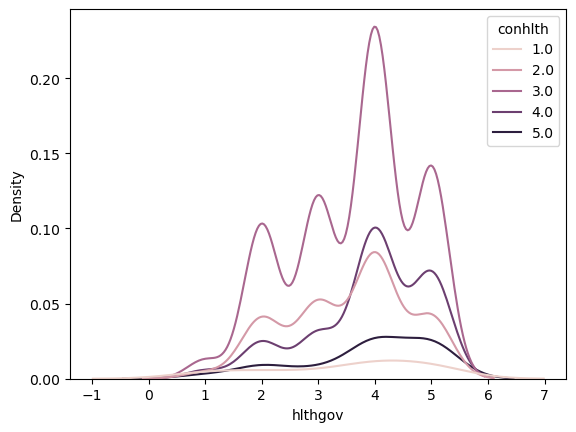

In [29]:
# display(pd.crosstab(total_df['hlthgov'], total_df['conhlth']))
# display(pd.crosstab(total_df['hlthgov'], total_df['conhlth'], normalize='all'))
# display(total_df.loc[:,['hlthgov', 'conhlth']].groupby('hlthgov').describe())
display(pd.crosstab(total_df['conhlth'], total_df['hlthgov']))
display(pd.crosstab(total_df['conhlth'], total_df['hlthgov'], normalize='all'))
display(total_df.loc[:,['conhlth', 'hlthgov']].groupby('conhlth').describe())
sns.kdeplot(data=total_df, x='hlthgov', hue='conhlth')
# more confident agree with less gov provision, less confident agree with more gov provision
# maybe trend comes from those who are more confident think that they can opperate well without too much government provision

**Confidence in the U.S. healthcare system ('CONHLTH') vs willingness to pay higher taxes for healthcare improvements ('HLTHTAX')**

- keep -rd

hlthtax,1,2,3,4,5
conhlth,,,,,
1.0,6,14,8,6,9
2.0,17,74,40,36,34
3.0,55,151,118,71,86
4.0,48,64,32,23,39
5.0,17,20,6,6,28


hlthtax,1,2,3,4,5
conhlth,,,,,
1.0,0.005952,0.013889,0.007937,0.005952,0.008929
2.0,0.016865,0.073413,0.039683,0.035714,0.033730
3.0,0.054563,0.149802,0.117063,0.070437,0.085317
4.0,0.047619,0.063492,0.031746,0.022817,0.038690
5.0,0.016865,0.019841,0.005952,0.005952,0.027778


hlthtax                                             
          count      mean       std  min  25%  50%  75%  max
conhlth                                                     
1.0        43.0  2.953488  1.379328  1.0  2.0  3.0  4.0  5.0
2.0       201.0  2.980100  1.252838  1.0  2.0  3.0  4.0  5.0
3.0       481.0  2.962578  1.279100  1.0  2.0  3.0  4.0  5.0
4.0       206.0  2.713592  1.428118  1.0  2.0  2.0  4.0  5.0
5.0        77.0  3.103896  1.643043  1.0  2.0  3.0  5.0  5.0

<Axes: xlabel='hlthtax', ylabel='Density'>

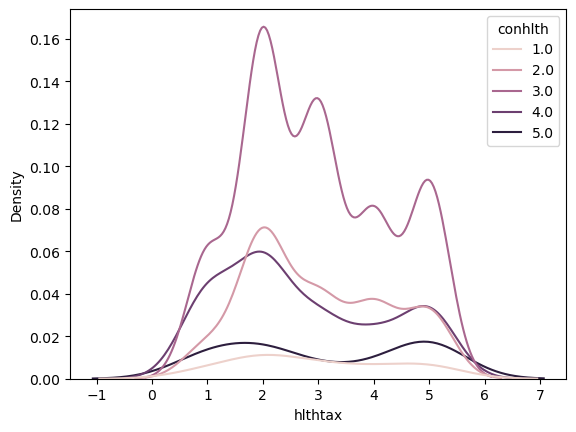

In [28]:
# display(pd.crosstab(total_df['hlthtax'], total_df['conhlth']))
# display(pd.crosstab(total_df['hlthtax'], total_df['conhlth'], normalize='all'))
# display(total_df.loc[:,['hlthtax', 'conhlth']].groupby('hlthtax').describe())
display(pd.crosstab(total_df['conhlth'], total_df['hlthtax']))
display(pd.crosstab(total_df['conhlth'], total_df['hlthtax'], normalize='all'))
display(total_df.loc[:,['conhlth', 'hlthtax']].groupby('conhlth').describe())
sns.kdeplot(data=total_df, x='hlthtax', hue='conhlth')
# less confident more willing to tax, but differs at two extreme endpoints
# completely confident: tend to be more willing to tax (2nd most willing group after very little confidence group), maybe because if you have 100% confidence in something you trust it enough to put the extra money you give it to good use to maintain that 100% confidence
# no confidence: group that is most opposed to tax, maybe because if you have no confidence in a system you definitely don't want to give it more money

**HLTHSAT VS HLTHINF** 
- probably not needed - rd


In [ ]:
display(pd.crosstab(total_df['hlthinf'], total_df['hlthsat']))
display(pd.crosstab(total_df['hlthinf'], total_df['hlthsat'], normalize='all'))
display(total_df.loc[:,['hlthinf', 'hlthsat']].groupby('hlthinf').describe())
sns.kdeplot(data=total_df, x='hlthinf', hue='hlthsat')
# more satisfied thinks more efficient, less satisfied thinks more inefficient

**HLTHSAT VS HLTHGOV**
- keep -rd

hlthgov,1,2,3,4,5
hlthsat,,,,,
1,1,8,10,14,5
2,4,30,24,47,33
3,8,65,67,155,86
4,7,24,38,53,27
5,6,21,31,72,43
6,1,6,5,34,37
7,1,2,5,17,21


hlthgov,1,2,3,4,5
hlthsat,,,,,
1,0.000992,0.007937,0.009921,0.013889,0.004960
2,0.003968,0.029762,0.023810,0.046627,0.032738
3,0.007937,0.064484,0.066468,0.153770,0.085317
4,0.006944,0.023810,0.037698,0.052579,0.026786
5,0.005952,0.020833,0.030754,0.071429,0.042659
6,0.000992,0.005952,0.004960,0.033730,0.036706
7,0.000992,0.001984,0.004960,0.016865,0.020833


hlthgov                                             
          count      mean       std  min  25%  50%  75%  max
hlthsat                                                     
1          38.0  3.368421  1.050638  1.0  3.0  3.5  4.0  5.0
2         138.0  3.543478  1.159660  1.0  3.0  4.0  4.0  5.0
3         381.0  3.645669  1.072583  1.0  3.0  4.0  4.0  5.0
4         149.0  3.463087  1.106025  1.0  3.0  4.0  4.0  5.0
5         173.0  3.722543  1.074769  1.0  3.0  4.0  4.0  5.0
6          83.0  4.204819  0.933901  1.0  4.0  4.0  5.0  5.0
7          46.0  4.195652  0.957301  1.0  4.0  4.0  5.0  5.0

<Axes: xlabel='hlthgov', ylabel='Density'>

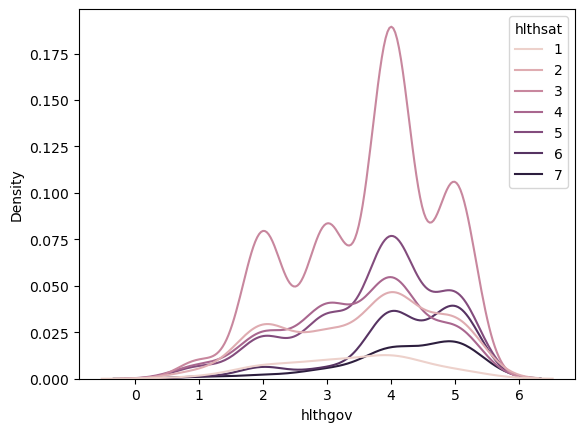

In [25]:
# display(pd.crosstab(total_df['hlthgov'], total_df['hlthsat']))
# display(pd.crosstab(total_df['hlthgov'], total_df['hlthsat'], normalize='all'))
# display(total_df.loc[:,['hlthgov', 'hlthsat']].groupby('hlthgov').describe())
display(pd.crosstab(total_df['hlthsat'], total_df['hlthgov']))
display(pd.crosstab(total_df['hlthsat'], total_df['hlthgov'], normalize='all'))
display(total_df.loc[:,['hlthsat', 'hlthgov']].groupby('hlthsat').describe())
sns.kdeplot(data=total_df, x='hlthgov', hue='hlthsat')
# more satisfied agree with less gov provision, less satisfied agree with more gov provision, outlier to this pattern is those completely neutral and those completely dissatisfied
# neutral: tend to agree more with less gov provision (2nd in terms of agreement levels after people who are completely satisfied), maybe since the healthcare system right now is dominated by the private sector (meaning limited government involvement) those who are netural don't want things to change because they don't want to take the chance of more government provision making things take a turn for the worse? not really sure what the explanation is for this outlier
# completely dissatisfied: may only be less than those who are very disatisfied due to smaller size? but also could be from other reasons?

**HLTHSAT VS HLTHTAX**

- keep -rd

hlthtax,1,2,3,4,5
hlthsat,,,,,
1,6,9,9,5,9
2,13,50,26,25,24
3,33,141,72,73,62
4,13,36,52,13,35
5,33,53,31,19,37
6,26,27,10,3,17
7,19,7,4,4,12


hlthtax,1,2,3,4,5
hlthsat,,,,,
1,0.005952,0.008929,0.008929,0.004960,0.008929
2,0.012897,0.049603,0.025794,0.024802,0.023810
3,0.032738,0.139881,0.071429,0.072421,0.061508
4,0.012897,0.035714,0.051587,0.012897,0.034722
5,0.032738,0.052579,0.030754,0.018849,0.036706
6,0.025794,0.026786,0.009921,0.002976,0.016865
7,0.018849,0.006944,0.003968,0.003968,0.011905


hlthtax                                              
          count      mean       std  min  25%  50%   75%  max
hlthsat                                                      
1          38.0  3.052632  1.413207  1.0  2.0  3.0  4.00  5.0
2         138.0  2.978261  1.275641  1.0  2.0  3.0  4.00  5.0
3         381.0  2.973753  1.249987  1.0  2.0  3.0  4.00  5.0
4         149.0  3.140940  1.268219  1.0  2.0  3.0  4.00  5.0
5         173.0  2.849711  1.422601  1.0  2.0  3.0  4.00  5.0
6          83.0  2.493976  1.484665  1.0  1.0  2.0  3.00  5.0
7          46.0  2.630435  1.691268  1.0  1.0  2.0  4.75  5.0

<Axes: xlabel='hlthtax', ylabel='Density'>

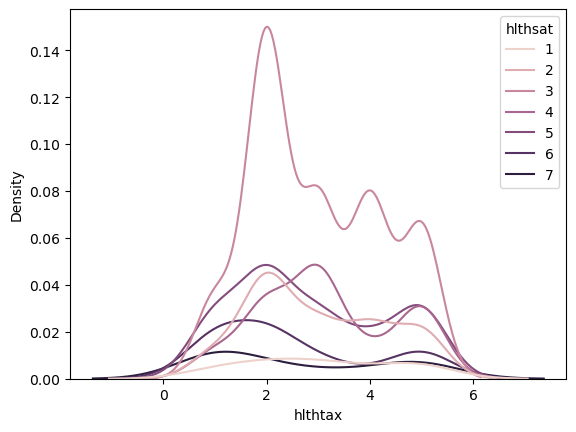

In [22]:
# display(pd.crosstab(total_df['hlthtax'], total_df['hlthsat']))
# display(pd.crosstab(total_df['hlthtax'], total_df['hlthsat'], normalize='all'))
# display(total_df.loc[:,['hlthtax', 'hlthsat']].groupby('hlthtax').describe())
display(pd.crosstab(total_df['hlthsat'], total_df['hlthtax']))
display(pd.crosstab(total_df['hlthsat'], total_df['hlthtax'], normalize='all'))
display(total_df.loc[:,['hlthsat', 'hlthtax']].groupby('hlthsat').describe())
sns.kdeplot(data=total_df, x='hlthtax', hue='hlthsat')
# generally: more satisfied less willing to pay tax, less satisfied more willing to pay tax
# two interesting points, those who are completely neutral for satisfaction and those who are most dissatisfied
# completely netural is average least willing to pay tax, they don't want to put more money into something they don't care/have strong opinions about
# most dissatisfied is very polarized between strong support for taxes and strong opposition against taxes (two camps: either paying taxes will help increase satisfaction or paying taxes won't do anything and is just a waste of money)

probably not needed

In [ ]:
display(pd.crosstab(total_df['conhlth'], total_df['hlthsat']))
display(pd.crosstab(total_df['conhlth'], total_df['hlthsat'], normalize='all'))
display(total_df.loc[:,['conhlth', 'hlthsat']].groupby('conhlth').describe())
sns.kdeplot(data=total_df, x='conhlth', hue='hlthsat')
# positive correlation between confidence and satisfaction (more confident means more satisfied)

*Will add remaining two visualizations for HLTHINF vs HLTHGOV and HLTHTAX*
 - rd

**HLTHINF VS HLTHGOV**

hlthgov,1,2,3,4,5
hlthinf,,,,,
1,11,11,27,87,96
2,7,83,60,157,74
3,8,32,62,75,42
4,2,27,27,63,27
5,0,3,4,10,13


hlthgov,1,2,3,4,5
hlthinf,,,,,
1,0.010913,0.010913,0.026786,0.086310,0.095238
2,0.006944,0.082341,0.059524,0.155754,0.073413
3,0.007937,0.031746,0.061508,0.074405,0.041667
4,0.001984,0.026786,0.026786,0.062500,0.026786
5,0.000000,0.002976,0.003968,0.009921,0.012897


hlthgov                                             
          count      mean       std  min  25%  50%  75%  max
hlthinf                                                     
1         232.0  4.060345  1.071381  1.0  4.0  4.0  5.0  5.0
2         381.0  3.545932  1.088754  1.0  3.0  4.0  4.0  5.0
3         219.0  3.506849  1.072465  1.0  3.0  4.0  4.0  5.0
4         146.0  3.589041  1.035049  1.0  3.0  4.0  4.0  5.0
5          30.0  4.100000  0.994814  2.0  4.0  4.0  5.0  5.0

<Axes: xlabel='hlthgov', ylabel='Density'>

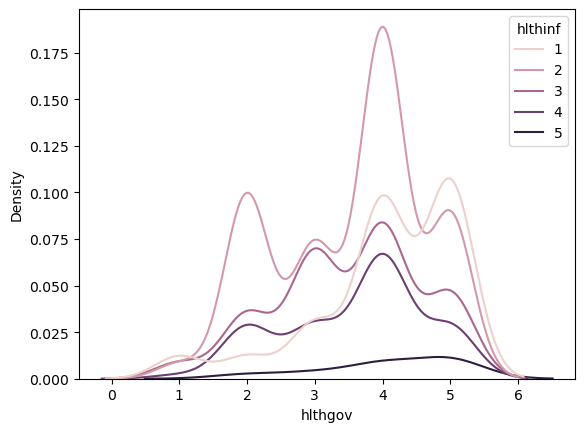

In [23]:
# display(pd.crosstab(total_df['hlthgov'], total_df['hlthinf']))
# display(pd.crosstab(total_df['hlthgov'], total_df['hlthinf'], normalize='all'))
# display(total_df.loc[:,['hlthgov', 'hlthinf']].groupby('hlthgov').describe())
display(pd.crosstab(total_df['hlthinf'], total_df['hlthgov']))
display(pd.crosstab(total_df['hlthinf'], total_df['hlthgov'], normalize='all'))
display(total_df.loc[:,['hlthinf', 'hlthgov']].groupby('hlthinf').describe())
sns.kdeplot(data=total_df, x='hlthgov', hue='hlthinf')
# curved relationship? neutral opinions on efficiency correspond to neutral opinions on gov provision, on both ends of efficiency want more gov provision
# neutral people: if you think the system is working well then you don't care/have strong opinions about what the government does
# tail ends: if you think the system is very inefficient you want more government invovlement to fix things, if you think the system is very efficient you want more government involvement because they are already doing a great job?

**HLTHINF VS HLTHTAX**

hlthtax,1,2,3,4,5
hlthinf,,,,,
1,69,70,33,21,39
2,42,141,70,48,80
3,14,61,65,30,49
4,15,42,30,37,22
5,3,9,6,6,6


hlthtax,1,2,3,4,5
hlthinf,,,,,
1,0.068452,0.069444,0.032738,0.020833,0.038690
2,0.041667,0.139881,0.069444,0.047619,0.079365
3,0.013889,0.060516,0.064484,0.029762,0.048611
4,0.014881,0.041667,0.029762,0.036706,0.021825
5,0.002976,0.008929,0.005952,0.005952,0.005952


hlthtax                                             
          count      mean       std  min  25%  50%  75%  max
hlthinf                                                     
1         232.0  2.530172  1.429117  1.0  1.0  2.0  4.0  5.0
2         381.0  2.955381  1.334010  1.0  2.0  3.0  4.0  5.0
3         219.0  3.178082  1.241586  1.0  2.0  3.0  4.0  5.0
4         146.0  3.061644  1.249676  1.0  2.0  3.0  4.0  5.0
5          30.0  3.100000  1.322224  1.0  2.0  3.0  4.0  5.0

<Axes: xlabel='hlthtax', ylabel='Density'>

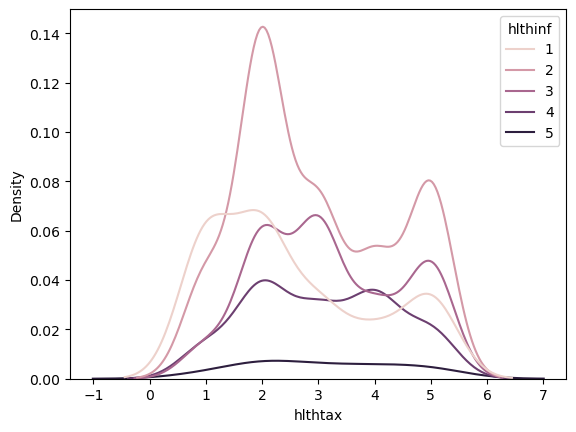

In [24]:
# display(pd.crosstab(total_df['hlthtax'], total_df['hlthinf']))
# display(pd.crosstab(total_df['hlthtax'], total_df['hlthinf'], normalize='all'))
# display(total_df.loc[:,['hlthtax', 'hlthinf']].groupby('hlthtax').describe())
display(pd.crosstab(total_df['hlthinf'], total_df['hlthtax']))
display(pd.crosstab(total_df['hlthinf'], total_df['hlthtax'], normalize='all'))
display(total_df.loc[:,['hlthinf', 'hlthtax']].groupby('hlthinf').describe())
sns.kdeplot(data=total_df, x='hlthtax', hue='hlthinf')
# general trend of more willing to pay taxes if think system is inefficient, but those with neutral opinions on efficiency are most opposed against taxes
# maybe if you don't care/have strong opinions about the system then you are least likely to want to pay more money for it?